<a href="https://colab.research.google.com/github/jandujarr/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
# Your code here :
from tensorflow import keras

print(keras.__version__)

3.5.0


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

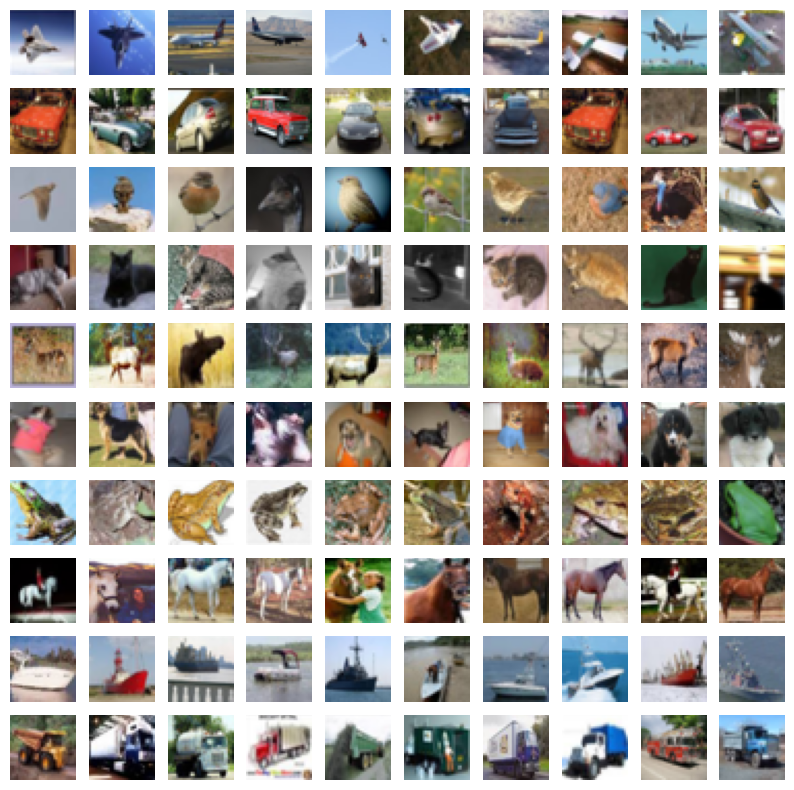

In [ ]:
# prompt: In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import pickle

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(x_train[np.random.choice(np.where(y_train == i)[0])])
        axes[i,j].axis('off')
plt.show()

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Normalize the images.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# prompt: For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.
# Use the input as (32,32,3).
# The filter maps can then be flattened to provide features to the classifier.
# Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# prompt: Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# prompt: Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.1316 - loss: 2.2766 - val_accuracy: 0.2104 - val_loss: 2.1987
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2302 - loss: 2.1650 - val_accuracy: 0.2726 - val_loss: 2.0649
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2794 - loss: 2.0395 - val_accuracy: 0.3032 - val_loss: 1.9761
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3131 - loss: 1.9596 - val_accuracy: 0.3250 - val_loss: 1.9222
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3314 - loss: 1.9157 - val_accuracy: 0.3415 - val_loss: 1.8794
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3500 - loss: 1.8709 - val_accuracy: 0.3532 - val_loss: 1.8426
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3659 - loss: 1.8353 - val_accuracy: 0.3718 - val_loss: 1.8100
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3750 - loss: 1.8049 - val_accuracy: 0.3794 - v

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

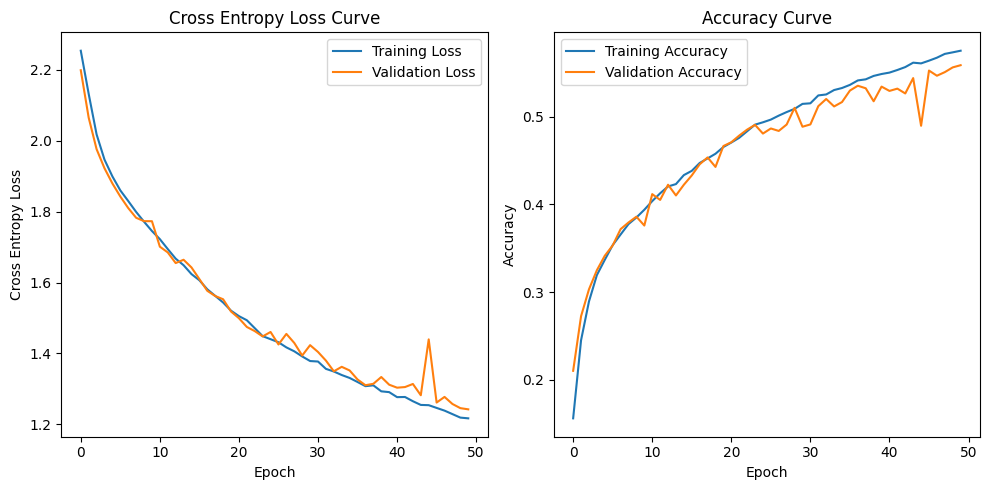

In [ ]:
# prompt: Plot the cross entropy loss curve and the accuracy curve

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.title('Cross Entropy Loss Curve')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()

*   Plot the cross entropy loss curve and the accuracy curve

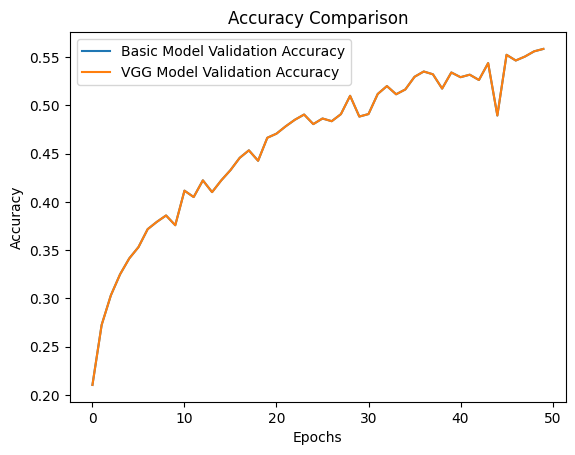

In [ ]:
# Your code here :
# Plot both models' accuracy curves
plt.plot(history.history['val_accuracy'], label='Basic Model Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='VGG Model Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# prompt: Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.
# Stack two convolutional layers with 32 filters, each of 3 x 3.
# Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.
# For all the layers, use ReLU activation function.
# Use same padding for the layers to ensure that the height and width of each layer output matches the input

clear_session()

vgg_model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_model.summary()

vgg_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

vgg_history = vgg_model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.1302 - loss: 2.2922 - val_accuracy: 0.2038 - val_loss: 2.2283
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2254 - loss: 2.1921 - val_accuracy: 0.2956 - val_loss: 2.0651
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2928 - loss: 2.0327 - val_accuracy: 0.3339 - val_loss: 1.9456
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3302 - loss: 1.9274 - val_accuracy: 0.3283 - val_loss: 1.9174
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3379 - loss: 1.8874 - val_accuracy: 0.3555 - val_loss: 1.8338
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3621 - loss: 1.8228 - val_accuracy: 0.3767 - val_loss: 1.7787
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3727 - loss: 1.7890 - val_accuracy: 0.3772 - val_loss: 1.7714
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3852 - loss: 1.7503 - val_accuracy: 0.3895 - v

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

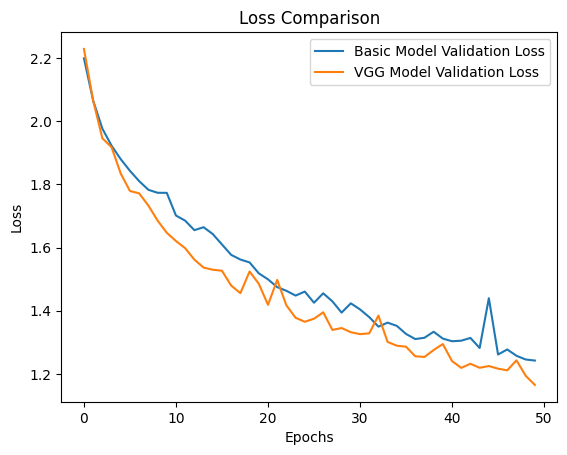

Observations:
The VGG model performs better than the basic model in terms of validation accuracy.
The VGG model achieves a lower validation loss than the basic model.


In [ ]:
# prompt: Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.

# Plot both models' loss curves
plt.plot(history.history['val_loss'], label='Basic Model Validation Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Model Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Analyze the plots
print("Observations:")
if max(history.history['val_accuracy']) > max(vgg_history.history['val_accuracy']):
    print("The basic model performs slightly better than the VGG model in terms of validation accuracy.")
elif max(vgg_history.history['val_accuracy']) > max(history.history['val_accuracy']):
    print("The VGG model performs better than the basic model in terms of validation accuracy.")
else:
    print("Both models have similar validation accuracy.")

if min(history.history['val_loss']) < min(vgg_history.history['val_loss']):
    print("The basic model achieves a slightly lower validation loss than the VGG model.")
elif min(vgg_history.history['val_loss']) < min(history.history['val_loss']):
    print("The VGG model achieves a lower validation loss than the basic model.")
else:
    print("Both models have similar validation loss.")

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [ ]:
# Your code here :

**Comment on the observation**

Observations:
The VGG model performs better than the basic model in terms of validation accuracy.
The VGG model achieves a lower validation loss than the basic model.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


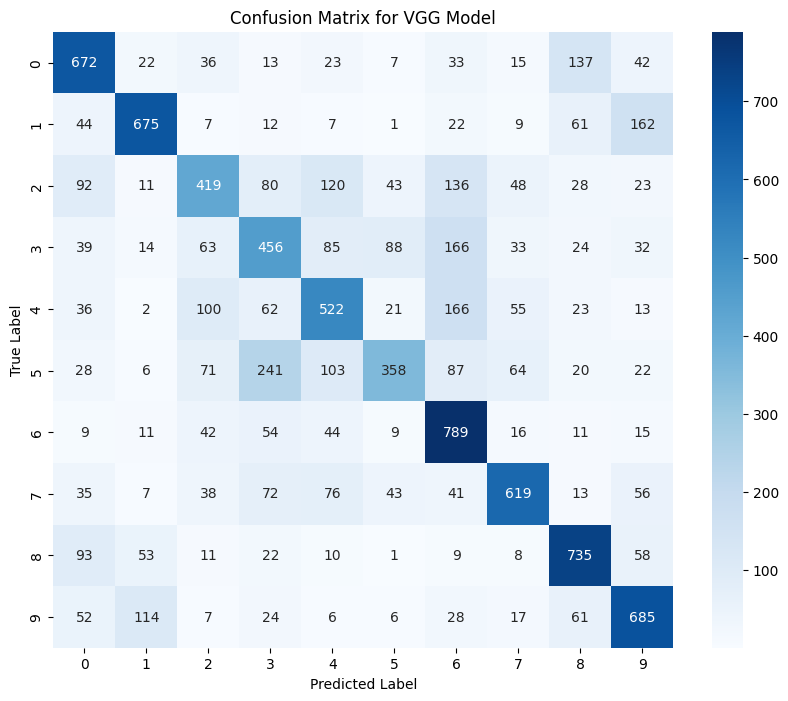

Confusion Matrix Analysis:
Class 5 is most frequently misclassified.


In [ ]:
# prompt: Use predict function to predict the output for the test split
# Plot the confusion matrix for the new model and comment on the class confusions.

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the output for the test split using the VGG model
y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG Model')
plt.show()

# Comment on the class confusions
print("Confusion Matrix Analysis:")
# Analyze the confusion matrix to identify the most frequent misclassifications
# Example:
# Find classes with the highest number of misclassifications along the rows
misclassifications_by_class = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
most_misclassified_class = np.argmax(misclassifications_by_class)
print(f"Class {most_misclassified_class} is most frequently misclassified.")
# Further detailed analysis can be done based on the specific values in the confusion matrix

**Comment here :**

Confusion Matrix Analysis:
Class 5 is most frequently misclassified.

*    Print the test accuracy for the trained model.

In [ ]:
# prompt: Print the test accuracy for the trained model.

_, test_accuracy = vgg_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.5929999947547913


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# prompt: Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.
# Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.
# Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.
# For all the layers, use ReLU activation function.
# Use same padding for the layers to ensure that the height and width of each layer output matches the input
# Change the size of input to 64 x 64.

clear_session()

vgg_model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5794 - loss: 1.2076 - val_accuracy: 0.5516 - val_loss: 1.2632
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5735 - loss: 1.2114 - val_accuracy: 0.5473 - val_loss: 1.2843
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5821 - loss: 1.2066 - val_accuracy: 0.5571 - val_loss: 1.2477
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5843 - loss: 1.1921 - val_accuracy: 0.5599 - val_loss: 1.2387
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5847 - loss: 1.1905 - val_accuracy: 0.5588 - val_loss: 1.2394
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5892 - loss: 1.1804 - val_accuracy: 0.5532 - val_loss: 1.2447
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5886 - loss: 1.1808 - val_accuracy: 0.5519 - val_loss: 1.2573
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5927 - loss: 1.1654 - val_accuracy: 0.5666 - val

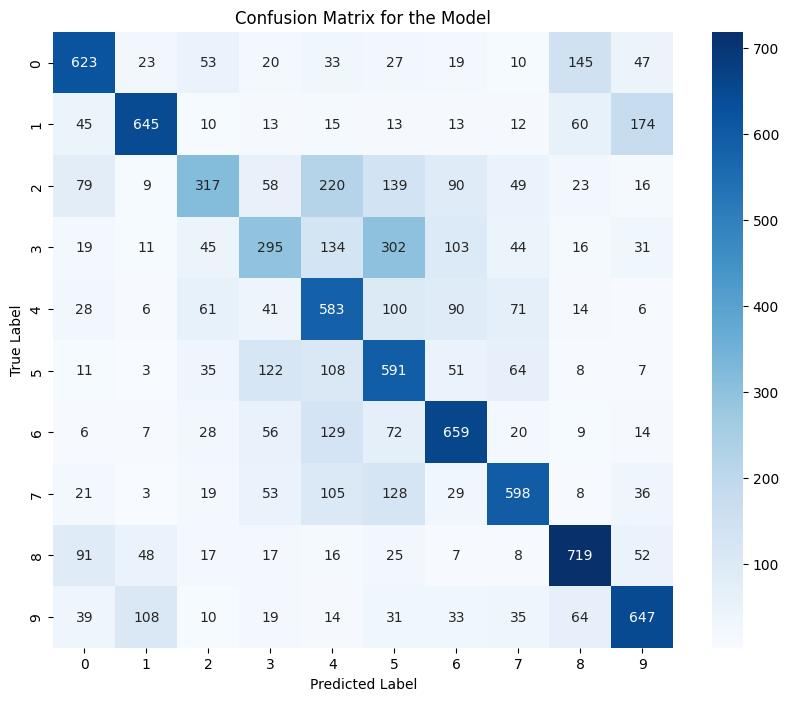

Confusion Matrix Analysis:
Class 3 is most frequently misclassified.


In [ ]:
# prompt: Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
# Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
# Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Predict the output for the test split
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the Model')
plt.show()

# Comment on the class confusions (Example)
print("Confusion Matrix Analysis:")
# Analyze the confusion matrix to identify the most frequent misclassifications
# Example:
# Find classes with the highest number of misclassifications along the rows
misclassifications_by_class = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
most_misclassified_class = np.argmax(misclassifications_by_class)
print(f"Class {most_misclassified_class} is most frequently misclassified.")
# Further detailed analysis can be done based on the specific values in the confusion matrix

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

# What is the use of activation functions in a network? Why is it needed?
Activation functions introduce non-linearity into the network.  Without them, a neural network would simply be a series of linear transformations, which could be reduced to a single linear transformation.  Non-linearity is crucial for the network to learn complex patterns and relationships in data that can't be represented by a single linear function.  They enable the network to approximate highly complex functions.

# We have used the softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
Sigmoid activation outputs a probability between 0 and 1 for *each* individual neuron.  It's commonly used in the output layer for binary classification problems.
 Softmax activation, on the other hand, outputs a probability distribution *over all neurons* in the output layer. The probabilities for all neurons sum up to 1.  This is used for multi-class classification where each neuron represents a different class.  Softmax allows the network to express the confidence of its prediction across multiple classes simultaneously.

# What is the difference between categorical crossentropy and binary crossentropy loss?
Binary cross-entropy is used when you have a binary classification problem (two classes). It measures the difference between the predicted probability distribution and the true probability distribution (0 or 1) for each data point.
Categorical cross-entropy is used for multi-class classification problems.  It also measures the difference between the predicted probability distribution (output from softmax) and the true class label (one-hot encoded).  It's designed to handle multiple classes and inherently normalizes the output probabilities.

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
